In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!curl $data > AB_NYC_2019.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  8805k      0 --:--:-- --:--:-- --:--:-- 8793k


In [4]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [5]:
df.price = np.log1p(df.price)

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [7]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = df.select_dtypes(include=[np.number]).columns

In [8]:
categorical_columns = ['neighbourhood_group','room_type']
numerical_columns   = ['latitude',
           'longitude',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']
target_column = 'price'

In [9]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [10]:
##Question 1
#Let's train a decision tree regressor to predict the price variable.
#Train a model with max_depth=1


In [11]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [12]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



In [13]:
#Which feature is used for splitting the data?
 #room_type *** 
 #neighbourhood_group
 #number_of_reviews
 #reviews_per_month

In [14]:
##Question 2
#Train a random forest model with these parameters:
 #n_estimators=10
 #random_state=1
 #n_jobs=-1 (optional - to make training faster)

In [15]:

from sklearn.ensemble import RandomForestRegressor

In [16]:
rf = RandomForestRegressor(n_estimators=10,
                            random_state=1,
                            n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [17]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [18]:
rmse(y_val, y_pred)

0.4615632303514057

In [19]:
#What's the RMSE of this model on validation?
 #0.059
 #0.259
 #0.459 ***** 
 #0.659

In [20]:
##Question 3
#Now let's experiment with the n_estimators parameter
#Try different values of this parameter from 10 to 200 with step 10
#Set random_state to 1
#Evaluate the model on the validation dataset

In [61]:
scores = []

for n in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n, 
                               random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    e = rmse(y_val, y_pred)
    
    print(n,e)

10 0.4615632303514057
20 0.44818440372465634
30 0.445534982591036
40 0.4436370400686574
50 0.4423252158693789
60 0.4416390063083674
70 0.44121796370827804
80 0.4411060230935213
90 0.44053259008166085
100 0.4399576086475665
110 0.43945857524445153
120 0.43922251032669835
130 0.43929019524179636
140 0.43899708308383795
150 0.43889026032031325
160 0.43868959689813103
170 0.43861743887334576


KeyboardInterrupt: 

In [ ]:
#After which value of n_estimators does RMSE stop improving?
 #10 ******
 #50
 #70
 #120

In [ ]:
#Question 4
#Let's select the best max_depth:
#Try different values of max_depth: [10, 15, 20, 25]
#For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
#Fix the random seed: random_state=1

In [63]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        f = rmse(y_val, y_pred)
    
        print(n,d,f)

10 10 0.44555264855924354
20 10 0.4420087608705588
30 10 0.4413808076445009
40 10 0.44147246709402543
50 10 0.4410673887594956
60 10 0.4410459421233984
70 10 0.4407598704010177
80 10 0.4405950365838957
90 10 0.4403250798157756
100 10 0.4401137602802354
110 10 0.4400259912335258
120 10 0.4398178667293093
130 10 0.4398547755113232
140 10 0.439849858533311
150 10 0.4396900165901451
160 10 0.4396442598915558
170 10 0.43962394971115537
180 10 0.4397169310258638
190 10 0.4396683937380781
10 15 0.45014955224590053
20 15 0.4413965306029092
30 15 0.4398942644411996
40 15 0.43928475526633337
50 15 0.4383515587792329
60 15 0.43798330311934036
70 15 0.43745781237443004
80 15 0.43726812528767756
90 15 0.4368731254920105
100 15 0.43651230928156826
110 15 0.43628106735528754
120 15 0.43621324755543006
130 15 0.43628631137379764
140 15 0.436211992518827
150 15 0.4362256909511473
160 15 0.4360759389159228
170 15 0.43604736304110847
180 15 0.4362009026058372
190 15 0.43616751568338963
10 20 0.4584190912

In [21]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        f = rmse(y_val, y_pred)
    
        scores.append((d,n,f))

In [ ]:
columns = [ 'max_depth','n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

[]

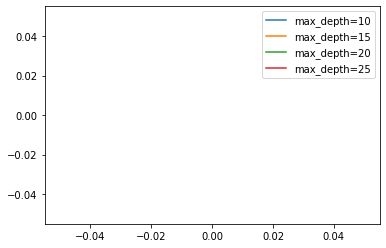

In [67]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
#What's the best max_depth:
 #10
 #15
 #20
 #25

In [ ]:
#Question 5
#We can extract feature importance information from tree-based models.
#At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.
#In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.
#For this homework question, we'll find the most important feature:
 #Train the model with these parametes:
  #n_estimators=10,
  #max_depth=20,
  #random_state=1,
  #n_jobs=-1 (optional)
  #Get the feature importance information from this model

In [ ]:
dt = DecisionTreeRegressor(n_estimators=10, 
                            max_depth=20, 
                            random_state=1,
                            n_jobs=-1)
dt.fit(X_train, y_train)

In [ ]:
print(export_text(dt, feature_names=dv.get_feature_names()))

In [ ]:
#What's the most important feature?
 #neighbourhood_group=Manhattan
 #room_type=Entire home/apt
 #longitude
 #latitude

In [ ]:
#Question 6
#Now let's train an XGBoost model! For this question, we'll tune the eta parameter
#Install XGBoost
#Create DMatrix for train and validation
#Create a watchlist
#Train a model with these parameters for 100 rounds:
#xgb_params = {
#    'eta': 0.3, 
#    'max_depth': 6,
#    'min_child_weight': 1,

#    'objective': 'reg:squarederror',
#    'nthread': 8,

#    'seed': 1,
#    'verbosity': 1,
#}

In [74]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 11.6 MB/s eta 0:00:01


In [76]:
import xgboost as xgb

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/jjwilson/opt/miniconda3/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
